## Comparison between Linear Regression in Shogun and SKlearn

Three different datasets are used.one is randomly generated straight line with noise,the second is the housing dataset provided by shogun and the last is the diabetes provided by Sklearn. 

In [1]:
%matplotlib inline
# import all shogun classes
from modshogun import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import time

## First Comparison

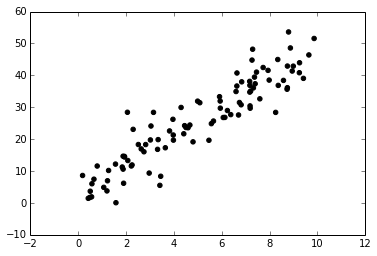

In [12]:
slope= 4.7

x_train = np.random.rand(100)*10
y_train = slope*(x_train)+np.random.randn(100)*5+2
y_true = slope*(x_train)+2
x_test = np.linspace(0,10, 40)
y_test = slope*(x_test)+2

shogun_x_train = RealFeatures(x_train.reshape(1,len(x_train)))
shogun_x_test = RealFeatures(x_test.reshape(1,len(x_test)))
shogun_labels_train = RegressionLabels(y_train)

plt.scatter(x_train, y_train,  color='black')

In [13]:
start = time.time()
shogun_regression_1 = LeastSquaresRegression(shogun_x_train, shogun_labels_train)
shogun_regression_1.train()
end = time.time()
out = shogun_regression_1.apply(shogun_x_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_1.get_w()
print 'Shogun Bias:'
print shogun_regression_1.get_bias()
print "Shogun RSS: "
print np.mean((out - y_test) ** 2)
print "Shogun time:"
print end-start
print "*************"
start = time.time()
sklearn_regression_1 = linear_model.LinearRegression()
# Train the model using the training sets
sklearn_regression_1.fit(x_train.reshape(len(x_train),1), y_train)
end = time.time()

out2 = sklearn_regression_1.predict(x_test.reshape(len(x_test),1))
print 'Sklearn Weights'
print sklearn_regression_1.coef_
print 'Sklearn Bias'
print sklearn_regression_1.intercept_
print"SKlearn RSS: "
print np.mean((out2 - y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ 4.9856143]
Shogun Bias:
0.847815695398
Shogun RSS: 
0.790771168916
Shogun time:
0.00019097328186
*************
Sklearn Weights
[ 4.43515181]
Sklearn Bias
3.5954812829
SKlearn RSS: 
0.688085651339
SKlearn time:
0.000419139862061


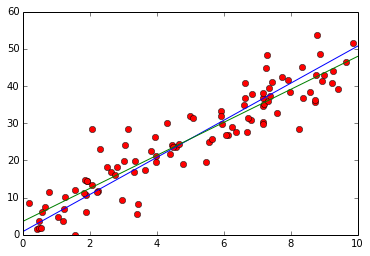

In [14]:
_=plt.plot(x_train,y_train, 'ro')
_=plt.plot(x_test,out, color='blue')
_=plt.plot(x_test, out2, color='green')

## Second Comparison

In [15]:
house_features = RealFeatures(CSVFile('data/uci/housing/fm_housing.dat')).get_feature_matrix()
house_labels = RegressionLabels(CSVFile('data/uci/housing/housing_label.dat')).get_labels()

house_train = house_features[:,:400]
house_labels_train = house_labels[:400]

house_test = house_features[:,400:]
house_labels_test = house_labels[400:]

shogun_house_train = RealFeatures(house_train)
shogun_house_label_train = RegressionLabels(house_labels_train)

shogun_house_test = RealFeatures(house_test)
shogun_house_label_test = RegressionLabels(house_labels_test)

In [16]:
start = time.time()
shogun_regression_2=LeastSquaresRegression(shogun_house_train, shogun_house_label_train)
shogun_regression_2.train()
end = time.time()

house_out = shogun_regression_2.apply(shogun_house_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_2.get_w()
print 'Shogun Bias:'
print shogun_regression_2.get_bias()
print "Shogun RSS: "
print np.mean((house_out - house_labels_test) ** 2)
print "Shogun time:"
print end-start
print "*******"

house_train_inverted = map(list, zip(*house_train))
house_test_inverted = map(list, zip(*house_test))

start = time.time()
sklearn_regression_2 = linear_model.LinearRegression()
sklearn_regression_2.fit(house_train_inverted, house_labels_train)
end = time.time()

house_out2 = sklearn_regression_2.predict(house_test_inverted)

print 'Sklearn Weights'
print sklearn_regression_2.coef_
print 'Sklearn Bias'
print sklearn_regression_2.intercept_
print"SKlearn RSS: "
print np.mean((house_out2 - house_labels_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ -2.07803677e-01   4.54598411e-02   3.80540419e-02   1.73671197e+00
  -2.48316331e+00   6.29751631e+00  -3.96993936e-03  -9.44676797e-01
   3.76983123e-01  -1.26846090e-02  -4.50995418e-01   1.11214277e-02
  -4.47627389e-01]
Shogun Bias:
0.0437820044396
Shogun RSS: 
36.048335804
Shogun time:
0.000425100326538
*******
Sklearn Weights
[ -1.91246374e-01   4.42289967e-02   5.52207977e-02   1.71631351e+00
  -1.49957220e+01   4.88773025e+00   2.60921031e-03  -1.29480799e+00
   4.84787214e-01  -1.54006673e-02  -8.08795026e-01  -1.29230427e-03
  -5.17953791e-01]
Sklearn Bias
28.6725995909
SKlearn RSS: 
37.8937785996
SKlearn time:
0.00204205513


## Third Dataset 

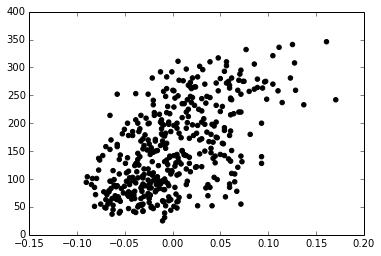

In [17]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

shogun_diab_x_train = RealFeatures(diabetes_X_train[:,0].reshape(1,len(diabetes_X_train[:,0])))
shogun_diab_x_test = RealFeatures(diabetes_X_test[:,0].reshape(1,len(diabetes_X_test[:,0])))
shogun_diab_labels_train = RegressionLabels(diabetes_y_train)
shogun_diab_labels_test = RegressionLabels(diabetes_y_test)

plt.scatter(diabetes_X_train, diabetes_y_train,  color='black')

In [18]:
start = time.time()
shogun_regression_3=LeastSquaresRegression(shogun_diab_x_train, shogun_diab_labels_train)
shogun_regression_3.train()
end = time.time()

diab_out = shogun_regression_3.apply(shogun_diab_x_test).get_labels()

print 'Shogun Weights:'
print shogun_regression_3.get_w()
print 'Shogun Bias:'
print shogun_regression_3.get_bias()
print "Shogun RSS: "
print np.mean((diab_out - diabetes_y_test) ** 2)
print "Shogun time:"
print end-start
print "*******"

start = time.time()
sklearn_regression_3 = linear_model.LinearRegression()
sklearn_regression_3.fit(diabetes_X_train, diabetes_y_train)
end = time.time()

diab_out3 = sklearn_regression_3.predict(diabetes_X_test)

print 'Sklearn Weights'
print sklearn_regression_3.coef_
print 'Sklearn Bias'
print sklearn_regression_3.intercept_
print"SKlearn RSS: "
print np.mean((diab_out3 - diabetes_y_test) ** 2)
print "SKlearn time:"
print end-start

Shogun Weights:
[ 970.16723129]
Shogun Bias:
152.903762266
Shogun RSS: 
2514.05967105
Shogun time:
0.000264167785645
*******
Sklearn Weights
[ 938.23786125]
Sklearn Bias
152.918861826
SKlearn RSS: 
2548.07239873
SKlearn time:
0.000478982925415


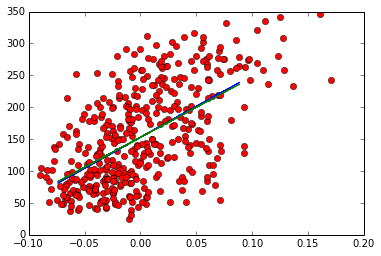

In [9]:
_=plt.plot(diabetes_X_train,diabetes_y_train, 'ro')
_=plt.plot(diabetes_X_test,diab_out, color='blue')
_=plt.plot(diabetes_X_test, diab_out3, color='green')